# *Predict Restaurant Rating*

In this data science machine learning project tutorial, we are going to build an end to end machine learning project to predict the rating of restaurants using Zomato dataset and then deploy it via Flask App.


Dataset Link - https://www.kaggle.com/datasets/shrutimehta/zomato-restaurants-data


Zomato API Analysis is one of the most useful analysis for foodies who want to taste the best cuisines of every part of the world which lies in their budget. This analysis is also for those who want to find the value for money restaurants in various parts of the country for the cuisines. Additionally, this analysis caters the needs of people who are striving to get the best cuisine of the country and which locality of that country serves that cuisines with maximum number of restaurants.♨️

For more information on Zomato API and Zomato API key
* Visit : https://developers.zomato.com/api#headline1
* Data Collection: https://developers.zomato.com/documentation

Data
Fetching the data:
* Data has been collected from the Zomato API in the form of .json files(raw data) using the url=https://developers.zomato.com/api/v2.1/search?entity_id=1&entity_type=city&start=1&count=20
* Raw data can be seen here

Data Collection:
Data collected can be seen as a raw .json file here

Data Storage:
The collected data has been stored in the Comma Separated Value file Zomato.csv. Each restaurant in the dataset is uniquely identified by its Restaurant Id. Every Restaurant contains the following variables:

* Restaurant Id: Unique id of every restaurant across various cities of the world
* Restaurant Name: Name of the restaurant
* Country Code: Country in which restaurant is located
* City: City in which restaurant is located
* Address: Address of the restaurant
* Locality: Location in the city
* Locality Verbose: Detailed description of the locality
* Longitude: Longitude coordinate of the restaurant's location
* Latitude: Latitude coordinate of the restaurant's location
* Cuisines: Cuisines offered by the restaurant
* Average Cost for two: Cost for two people in different currencies 👫
* Currency: Currency of the country
* Has Table booking: yes/no
* Has Online delivery: yes/ no
* Is delivering: yes/ no
* Switch to order menu: yes/no
* Price range: range of price of food
* Aggregate Rating: Average rating out of 5
* Rating color: depending upon the average rating color
* Rating text: text on the basis of rating of rating
* Votes: Number of ratings casted by people


-------------------------------------------------------------------------------------------------------------------------------------------------------------

We will be doing the below steps for this project

>>Perform extensive **Exploratory Data Analysis(EDA)** on the Zomato Dataset.

>>Build an appropriate **Machine Learning Model** that will help various Zomato Restaurants to predict their respective Ratings based on certain features

>>**DEPLOY** the Machine learning model via **Flask** that can be used to make live predictions of restaurants ratings


In [8]:
import pandas as pd # importing pandas
zData = pd.read_csv('zomato.csv') # Loading dataset
zData.head() # viewing first 5 rows in dataset

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [9]:
zData.dtypes # checking datatypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [10]:
zData.isna().sum() # Checking missing values

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [11]:
df = zData.drop(['url','phone'], axis = 1) # Dropping unwanted variables

In [14]:
df.duplicated().sum() # Checking duplicated values

43

In [29]:
df.drop_duplicates(inplace=True) # Removing duplicates

In [ ]:
# Here we removed the missing values but usually we will use other techniques such as Imputations

In [30]:
df.duplicated().sum() # Checking duplicated values

0

In [31]:
df.dropna(how = 'any', inplace=True) # Drop null values

In [33]:
df.isna().sum()

address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
dtype: int64

In [34]:
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [37]:
df.rename(columns={'approx_cost(for two people)' : 'cost', 'listed_in(type)':'type', 'listed_in(city)':'city'}, inplace=True)

In [38]:
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [47]:
df.cost = df.cost.map(lambda x:x.replace(',','')) # replacing , with nothing for values in cost 

In [49]:
df.cost = df.cost.astype(float) # changing object to float

In [50]:
df.dtypes # validating

address          object
name             object
online_order     object
book_table       object
rate             object
votes             int64
location         object
rest_type        object
dish_liked       object
cuisines         object
cost            float64
reviews_list     object
menu_item        object
type             object
city             object
dtype: object

In [62]:
# getting the rating values

df = df[df.rate != "NEW"]

In [67]:
df.rate = df.rate.map(lambda x: x.replace('/5',''))

C:\Users\KARTHI~1\AppData\Local\Temp/ipykernel_19320/2453887530.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rate = df.rate.map(lambda x: x.replace('/5',''))


In [68]:
df.rate

0         4.1
1         4.1
2         3.8
3         3.7
4         3.8
         ... 
51705    3.8 
51707    3.9 
51708    2.8 
51711    2.5 
51715    4.3 
Name: rate, Length: 23248, dtype: object

In [72]:
df.rate = df.rate.astype(float)

C:\Users\KARTHI~1\AppData\Local\Temp/ipykernel_19320/4058584810.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rate = df.rate.astype(float)


## *VISUALIZATION*

In [78]:
import seaborn as sns
import matplotlib as mlt
import matplotlib.pyplot as plt
%matplotlib inline

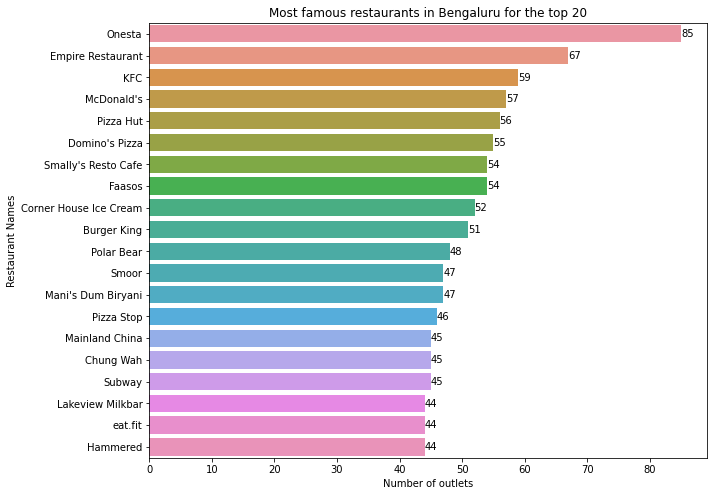

In [197]:
plt.figure(figsize=(10,8))
ax = sns.barplot(x = df['name'].value_counts()[:20].values, y =df['name'].value_counts()[:20].index)
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Most famous restaurants in Bengaluru for the top 20')
plt.xlabel('Number of outlets')
plt.ylabel('Restaurant Names')
plt.show()



Text(0.5, 0.98, 'Online Order Availability')

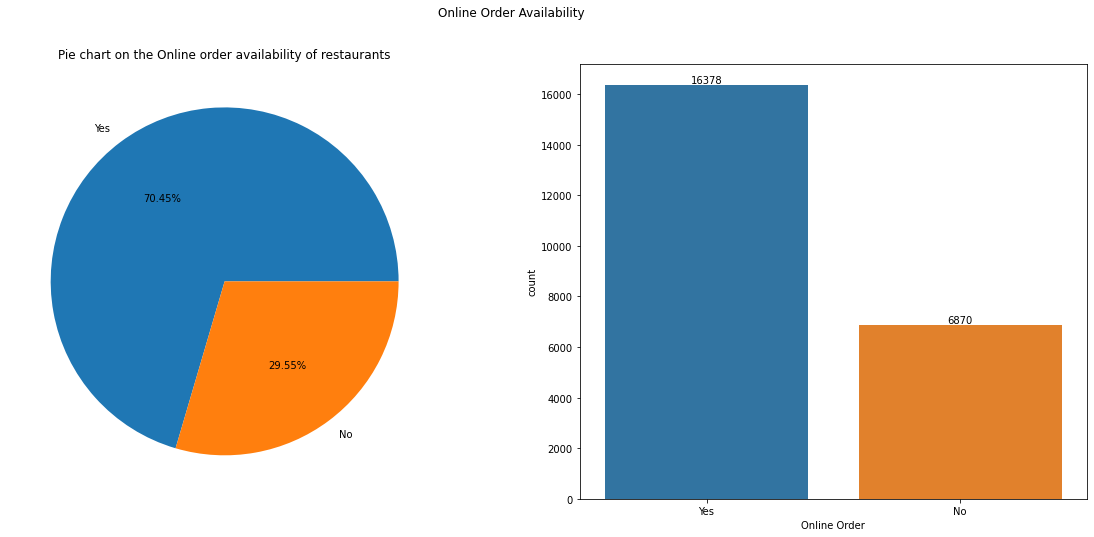

In [194]:
plt.figure(figsize=(20,8))
plt.subplot(121)
plt.pie(df['online_order'].value_counts(), labels=df['online_order'].value_counts().index, autopct='%.2f%%')
plt.title('Pie chart on the Online order availability of restaurants')
plt.subplot(122)
ax = sns.countplot(data=df, x = 'online_order')
for i in ax.containers:
    ax.bar_label(i,)
plt.xlabel('Online Order')
plt.suptitle('Online Order Availability')

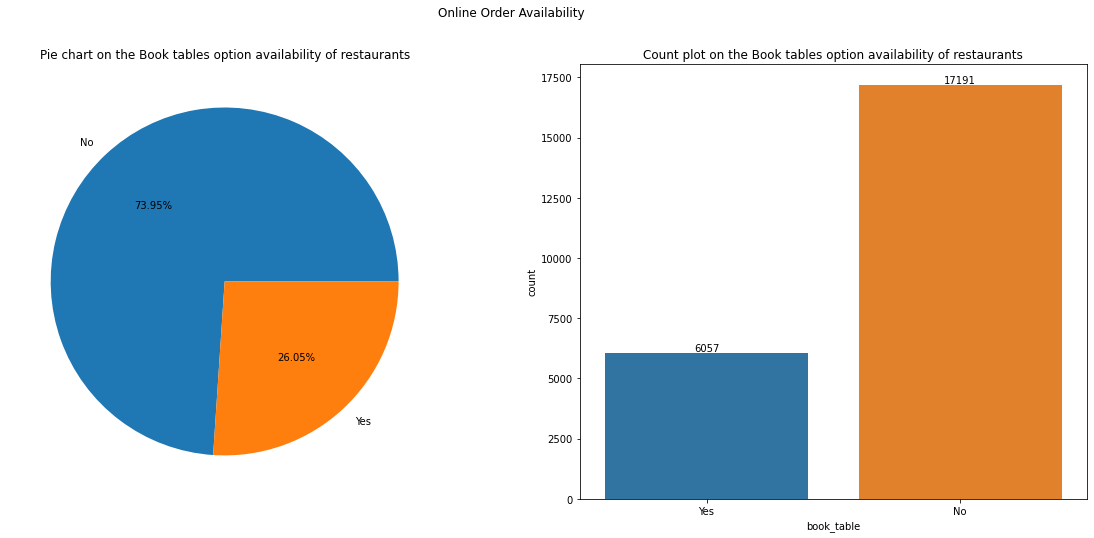

In [196]:
plt.figure(figsize=(20,8))
plt.subplot(121)
plt.pie(df['book_table'].value_counts(), labels=df['book_table'].value_counts().index, autopct='%.2f%%')
plt.title('Pie chart on the Book tables option availability of restaurants')
plt.subplot(122)
ax = sns.countplot(data=df, x = 'book_table')
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Count plot on the Book tables option availability of restaurants')
plt.suptitle('Online Order Availability')
plt.show()

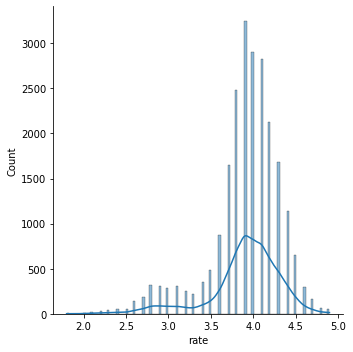

In [114]:
sns.displot(df.rate, kde=True)
plt.show()

In [116]:
df['rate'].unique()

array([4.1, 3.8, 3.7, 4.6, 4. , 4.2, 3.9, 3. , 3.6, 2.8, 4.4, 3.1, 4.3,
       2.6, 3.3, 3.5, 3.2, 4.5, 2.5, 2.9, 3.4, 2.7, 4.7, 2.4, 2.2, 2.3,
       4.8, 4.9, 2.1, 2. , 1.8])

In [117]:
df['rate'].min()

1.8

In [118]:
df['rate'].max()

4.9

In [123]:
# count between 1 and 2

((df['rate'] >= 1) & (df['rate'] <2)).sum()

5

In [124]:
# count between 2 and 3

((df['rate'] >= 2) & (df['rate'] <3)).sum()

1179

In [125]:
# count between 3 and 4

((df['rate'] >= 3) & (df['rate'] <4)).sum()

10153

In [126]:
# count between 4 and 5

((df['rate'] >= 4) & (df['rate'] <5)).sum()

11911

In [144]:
slices = [((df['rate'] >= 1) & (df['rate'] <2)).sum(), ((df['rate'] >= 2) & (df['rate'] <3)).sum(), ((df['rate'] >= 3) & (df['rate'] <4)).sum(),
         ((df['rate'] >= 4)).sum()]

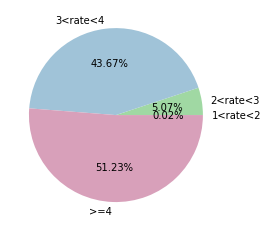

In [146]:
plt.pie(slices, labels = ['1<rate<2','2<rate<3','3<rate<4','>=4'], autopct='%.2f%%', colors=['#310709','#A0D8A3','#A0C3D8','#D8A0BA'])
plt.show('Percentage of ratings according to their ratings')
plt.show()

Text(0.5, 0.98, 'Type of Services in the Restaurants')

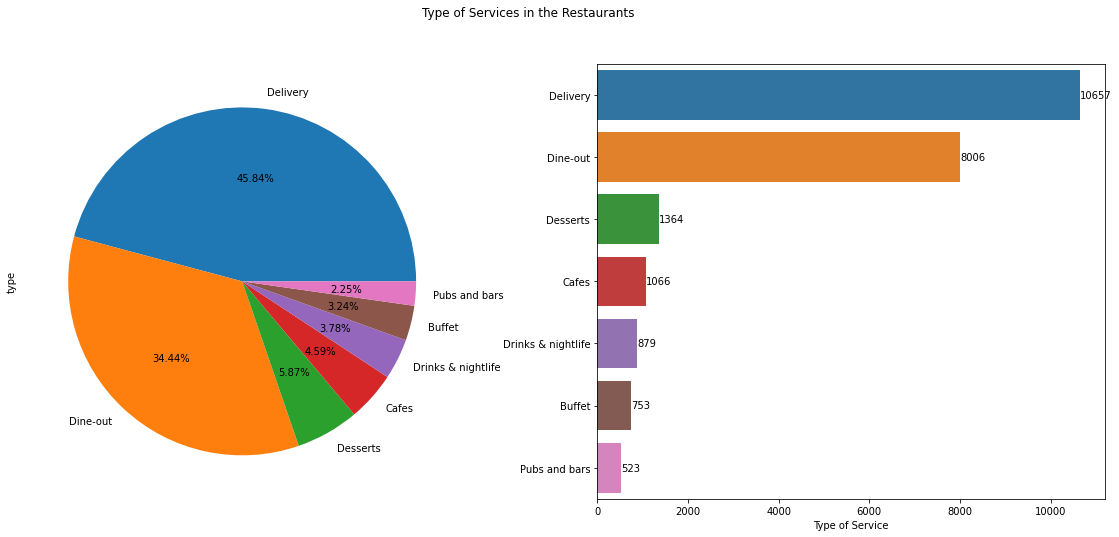

In [164]:
plt.figure(figsize=(20,8))
plt.subplot(121)
df['type'].value_counts().plot.pie(autopct = '%.2f%%')
plt.subplot(122)
ax = sns.barplot(x = df['type'].value_counts().values, y =df['type'].value_counts().index)
for i in ax.containers:
    ax.bar_label(i,)
plt.xlabel('Type of Service')
plt.suptitle('Type of Services in the Restaurants')

{'count': 23248.0, 'mean': 753.5009463179629, 'std': 520.4721690808921, 'min': 40.0, '25%': 400.0, '50%': 600.0, '75%': 1000.0, 'max': 6000.0}


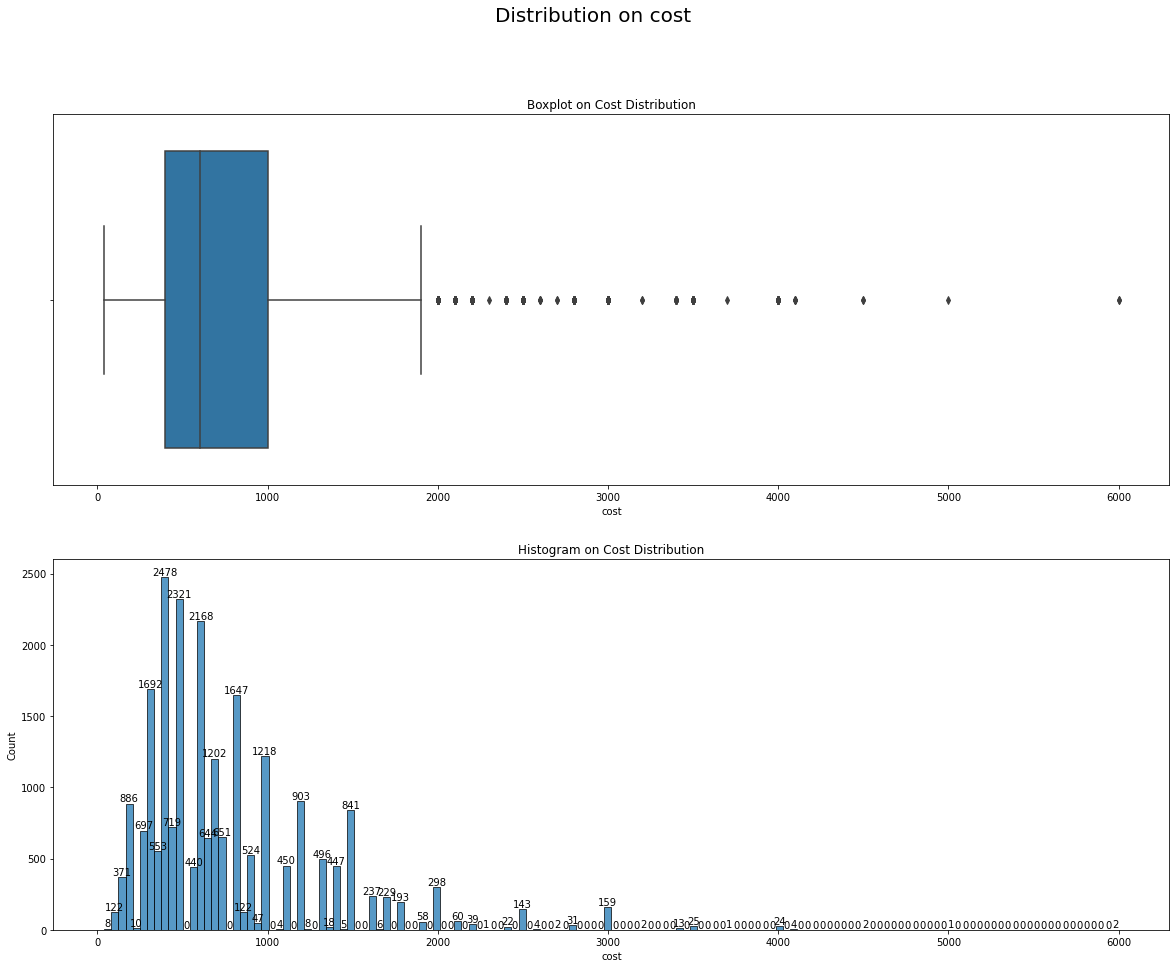

<Figure size 576x576 with 0 Axes>

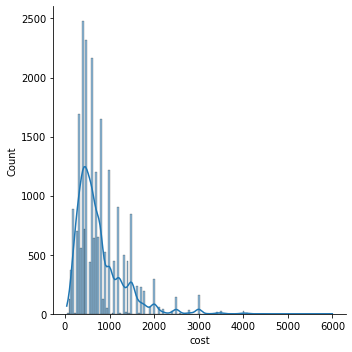

In [208]:
plt.figure(figsize=(20,15))
plt.subplot(2,1,1)
sns.boxplot(x = df['cost'])
plt.title('Boxplot on Cost Distribution')
print(dict(df['cost'].describe()))
plt.subplot(2,1,2)
ax = sns.histplot(x = df['cost'])
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Histogram on Cost Distribution')
plt.suptitle('Distribution on cost', fontsize = 20)
plt.show()

plt.figure(figsize=(8,8))
sns.displot(df['cost'],kde = True)
plt.show()

In [247]:
Liked_Dish = list()
for dishes in range(df.shape[0]):
    dish =df['dish_liked'][dishes].split(',')
    for d in dish:
        Liked_Dish.append(d)

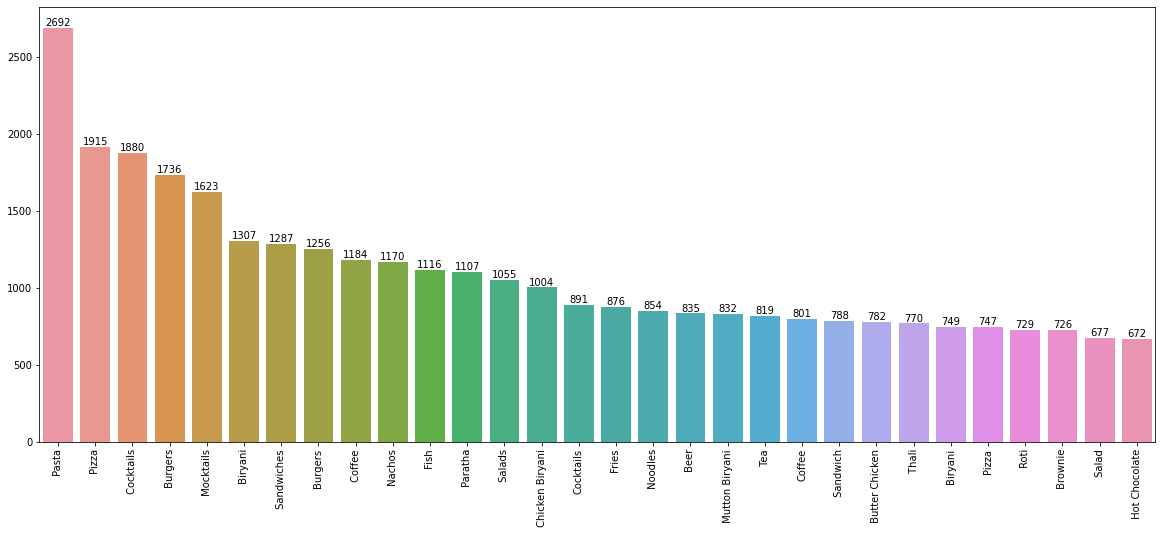

In [253]:
plt.figure(figsize=(20,8))
ax = sns.barplot(x = pd.Series(Liked_Dish).value_counts()[:30].index, y = pd.Series(Liked_Dish).value_counts()[:30].values)
for i in ax.containers:
    ax.bar_label(i,)
    plt.xticks(rotation = 90)
plt.show()

Text(0.5, 0.98, 'Type of Restaurants')

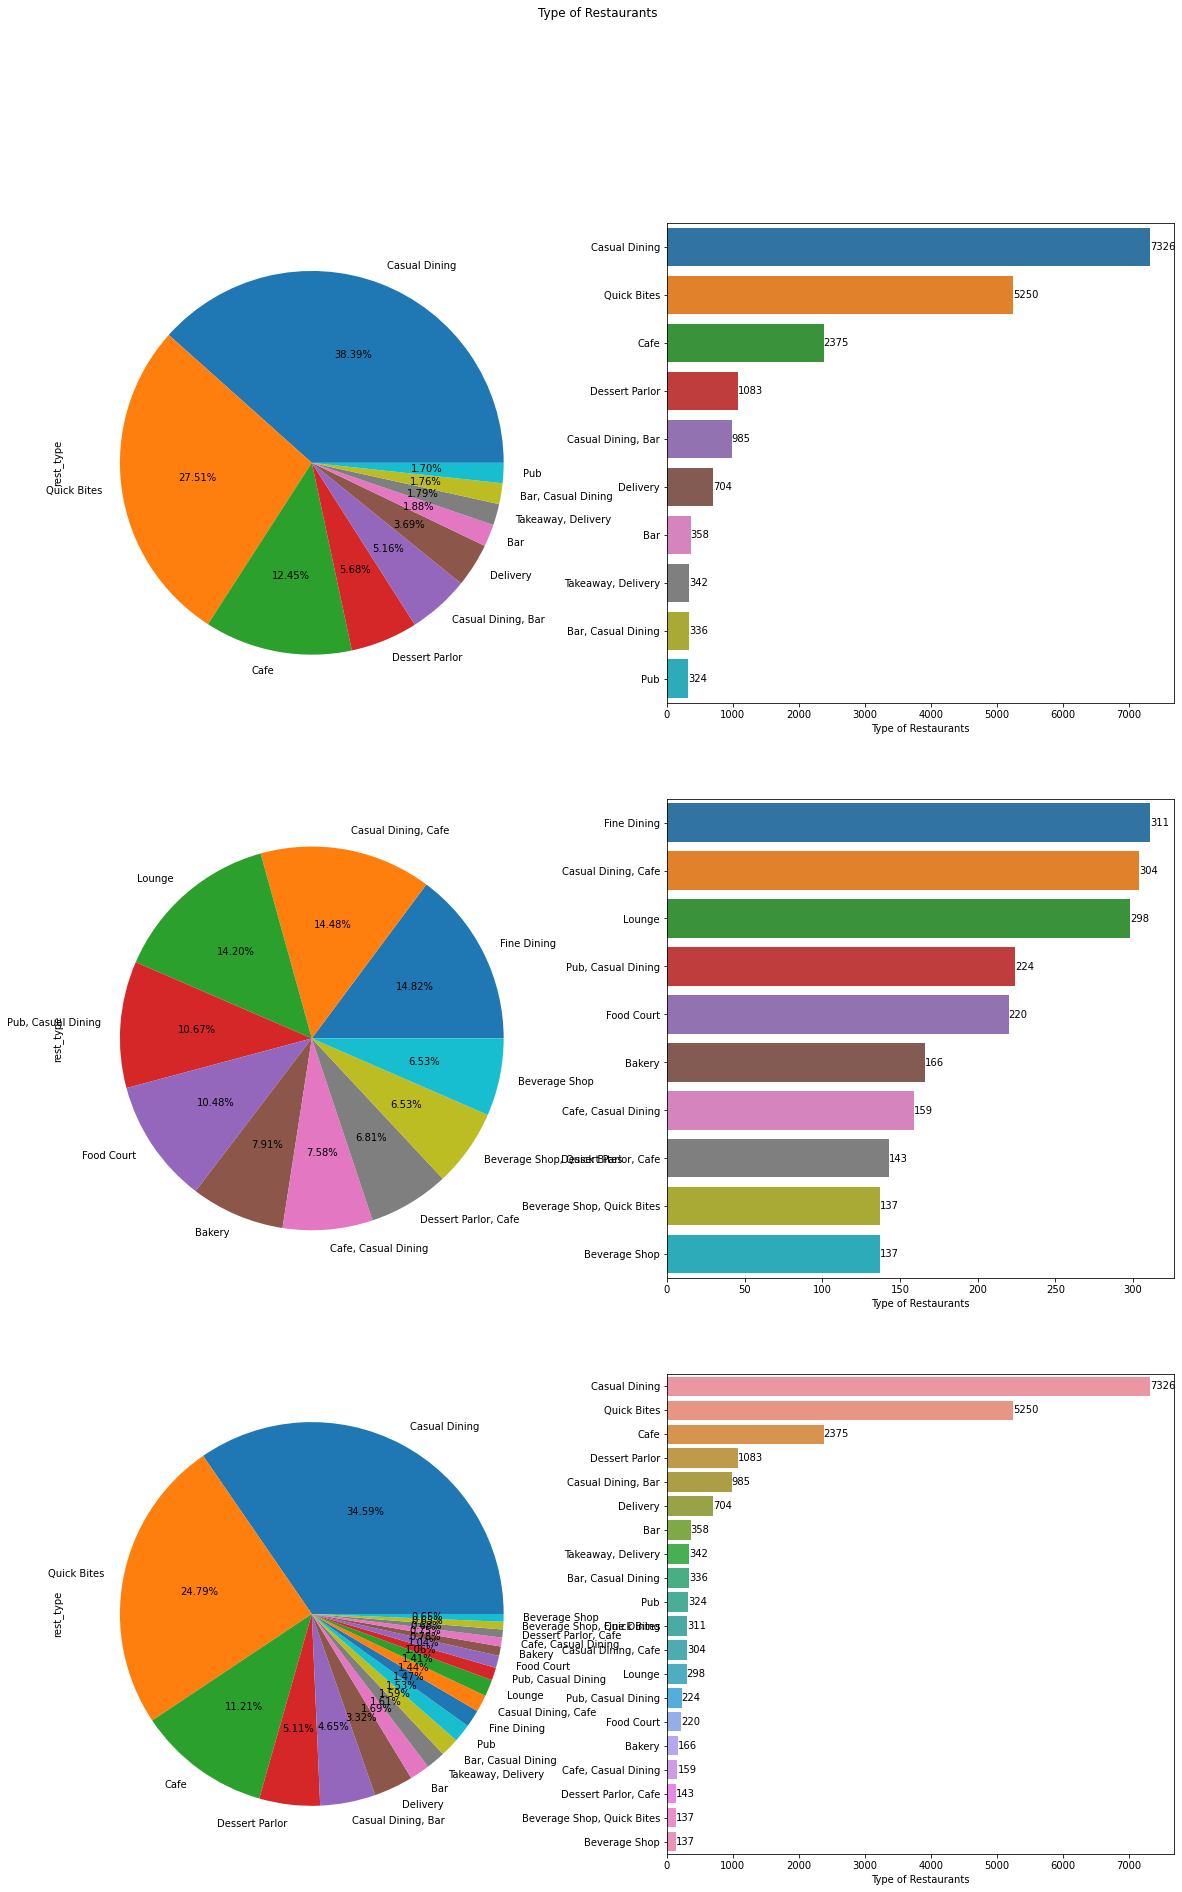

In [261]:
plt.figure(figsize=(20,30))
plt.subplot(321)
df['rest_type'].value_counts()[:10].plot.pie(autopct = '%.2f%%')
plt.subplot(322)
ax = sns.barplot(x = df['rest_type'].value_counts()[:10].values, y =df['rest_type'].value_counts()[:10].index)
for i in ax.containers:
    ax.bar_label(i,)
plt.xlabel('Type of Restaurants')
plt.subplot(323)
df['rest_type'].value_counts()[10:20].plot.pie(autopct = '%.2f%%')
plt.subplot(324)
ax = sns.barplot(x = df['rest_type'].value_counts()[10:20].values, y =df['rest_type'].value_counts()[10:20].index)
for i in ax.containers:
    ax.bar_label(i,)
plt.xlabel('Type of Restaurants')
plt.subplot(325)
df['rest_type'].value_counts()[0:20].plot.pie(autopct = '%.2f%%')
plt.subplot(326)
ax = sns.barplot(x = df['rest_type'].value_counts()[0:20].values, y =df['rest_type'].value_counts()[0:20].index)
for i in ax.containers:
    ax.bar_label(i,)
plt.xlabel('Type of Restaurants')


plt.suptitle('Type of Restaurants')

Text(0.5, 0, 'Type of Restaurants')

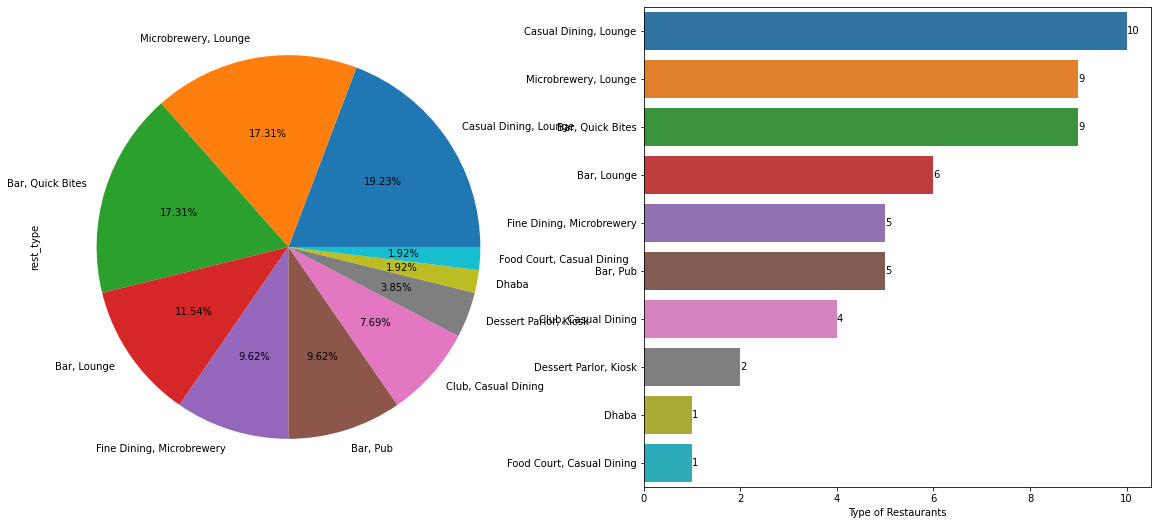

In [262]:
plt.figure(figsize=(20,30))
plt.subplot(321)
df['rest_type'].value_counts()[-10:].plot.pie(autopct = '%.2f%%')
plt.subplot(322)
ax = sns.barplot(x = df['rest_type'].value_counts()[-10:].values, y =df['rest_type'].value_counts()[-10:].index)
for i in ax.containers:
    ax.bar_label(i,)
plt.xlabel('Type of Restaurants')

In [266]:
Restaurant_types = list()
for types in range(df.shape[0]):
    type =df['rest_type'][types].split(',')
    for t in type:
        Restaurant_types.append(t)

In [270]:
Restaurant_types = pd.Series(Restaurant_types)

In [271]:
Restaurant_types.unique()

array(['Casual Dining', 'Cafe', ' Casual Dining', 'Quick Bites', ' Cafe',
       'Delivery', 'Dessert Parlor', 'Pub', 'Beverage Shop', 'Bar',
       'Takeaway', ' Delivery', 'Food Truck', ' Dessert Parlor', ' Bar',
       'Bakery', 'Sweet Shop', ' Beverage Shop', ' Quick Bites',
       'Microbrewery', 'Lounge', 'Food Court', ' Bakery', 'Kiosk', ' Pub',
       ' Microbrewery', 'Mess', ' Sweet Shop', 'Club', 'Fine Dining',
       ' Irani Cafee', ' Lounge', ' Kiosk', ' Food Court', 'Dhaba'],
      dtype=object)

In [273]:
Restaurant_types.replace({' Cafe': 'Cafe', ' Bar': 'Bar',' Beverage Shop':'Beverage Shop',' Quick Bites':'Quick Bites',
' Microbrewery': 'Microbrewery',' Pub': 'Pub',' Bakery':'Bakery',' Sweet Shop':'Sweet Shop',
' Food Court':'Food Court',' Irani Cafee':'Irani Cafee', ' Lounge':'Lounge', ' Kiosk':'Kiosk'}, inplace=True)

In [274]:
Restaurant_types.unique()

array(['Casual Dining', 'Cafe', ' Casual Dining', 'Quick Bites',
       'Delivery', 'Dessert Parlor', 'Pub', 'Beverage Shop', 'Bar',
       'Takeaway', ' Delivery', 'Food Truck', ' Dessert Parlor', 'Bakery',
       'Sweet Shop', 'Microbrewery', 'Lounge', 'Food Court', 'Kiosk',
       'Mess', 'Club', 'Fine Dining', 'Irani Cafee', 'Dhaba'],
      dtype=object)

In [276]:
Restaurant_types.replace({' Casual Dining': 'Casual Dining',' Delivery':'Delivery', ' Dessert Parlor':'Dessert Parlor'}, inplace=True)

In [277]:
Restaurant_types.unique()

array(['Casual Dining', 'Cafe', 'Quick Bites', 'Delivery',
       'Dessert Parlor', 'Pub', 'Beverage Shop', 'Bar', 'Takeaway',
       'Food Truck', 'Bakery', 'Sweet Shop', 'Microbrewery', 'Lounge',
       'Food Court', 'Kiosk', 'Mess', 'Club', 'Fine Dining',
       'Irani Cafee', 'Dhaba'], dtype=object)

Text(0.5, 0, 'Type of Restaurants')

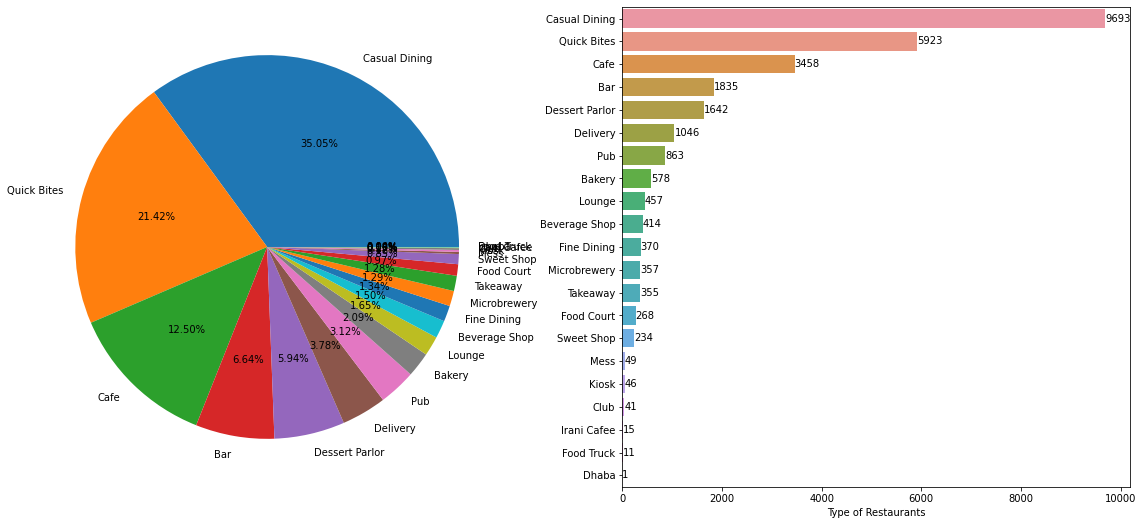

In [280]:
Restaurant_types.value_counts()

plt.figure(figsize=(20,30))
plt.subplot(321)
Restaurant_types.value_counts().plot.pie(autopct = '%.2f%%')
plt.subplot(322)
ax = sns.barplot(x = Restaurant_types.value_counts().values, y =Restaurant_types.value_counts().index)
for i in ax.containers:
    ax.bar_label(i,)
plt.xlabel('Type of Restaurants')

In [281]:
Restaurant_types.nunique()

21

## *MODEL BUILDING*

In [283]:
# Convert the online categorical values into numeric

In [286]:
df = pd.get_dummies(df,columns = ['online_order'],)

In [288]:
df = pd.get_dummies(df,columns = ['book_table'],)

In [290]:
from sklearn.preprocessing import LabelEncoder

In [291]:
le = LabelEncoder()

In [293]:
df['location'] = le.fit_transform(df['location'])
df['rest_type'] = le.fit_transform(df['rest_type'])
df['cuisines'] = le.fit_transform(df['cuisines'])
df['menu_item'] = le.fit_transform(df['menu_item'])

In [297]:
df.head(2)

,address,name,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city,online_order_No,online_order_Yes,book_table_No,book_table_Yes
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,4.1,775,1,20,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...",1386,800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",5047,Buffet,Banashankari,0,1,0,1
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,4.1,787,1,20,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...",594,800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",5047,Buffet,Banashankari,0,1,1,0


In [302]:
data = df.iloc[:,[2,3,4,5,7,8,10,13,14,15,16]]
data

,rate,votes,location,rest_type,cuisines,cost,menu_item,online_order_No,online_order_Yes,book_table_No,book_table_Yes
0,4.1,775,1,20,1386,800.0,5047,0,1,0,1
1,4.1,787,1,20,594,800.0,5047,0,1,1,0
2,3.8,918,1,16,484,800.0,5047,0,1,1,0
3,3.7,88,1,62,1587,300.0,5047,1,0,1,0
4,3.8,166,4,20,1406,600.0,5047,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
23243,3.8,128,84,5,1318,1200.0,5047,0,1,0,1
23244,3.9,77,84,38,878,2000.0,5047,1,0,1,0
23245,2.8,161,84,21,539,1200.0,5047,1,0,1,0
23246,2.5,81,84,21,80,800.0,5047,1,0,1,0


In [309]:
data.to_csv('Prepocessed_Zomato_data.csv', index=False)

In [305]:
y = data['rate']
X = data.drop('rate', axis = 1)

In [308]:
from sklearn.model_selection import train_test_split

In [310]:
xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size=0.3, random_state=0)

### *LINEAR REGRESSION*

In [311]:
from sklearn.linear_model import LinearRegression

lir = LinearRegression()

lir.fit(xtrain, ytrain)

LinearRegression()

In [312]:
from sklearn.metrics import r2_score

ypred = lir.predict(xtest)

In [313]:
r2_score(ytest, ypred)

0.23165012396399987

In [327]:
metrics.mean_squared_error(ytest, ypred,squared = False)
# If True returns MSE value, if False returns RMSE value

<IPython.core.display.Javascript object>

0.3723672072625435

In [325]:
np.sqrt(metrics.mean_absolute_error(ytest, ypred))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.5138028935784549

In [314]:
# Model is not good

### *DECISION TREE*

In [328]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()

dtr.fit(xtrain, ytrain)

DecisionTreeRegressor()

In [329]:
ypred = dtr.predict(xtest)

In [336]:
print(f'R2:{r2_score(ytest, ypred) }')
print(f'RMSE:{metrics.mean_squared_error(ytest, ypred,squared = True)}')
print(f'MSE:{metrics.mean_squared_error(ytest, ypred,squared = False)}')
print(f'MAE:{metrics.mean_absolute_error(ytest, ypred) }')

R2:0.8662924653956471


<IPython.core.display.Javascript object>

RMSE:0.024129021516438778


<IPython.core.display.Javascript object>

MSE:0.15533519085010575


<IPython.core.display.Javascript object>

MAE:0.037010951812027244


### *RANDOM FOREST*

In [337]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()

rfr.fit(xtrain, ytrain)

RandomForestRegressor()

In [338]:
ypred = rfr.predict(xtest)

In [339]:
print(f'R2:{r2_score(ytest, ypred) }')
print(f'RMSE:{metrics.mean_squared_error(ytest, ypred,squared = True)}')
print(f'MSE:{metrics.mean_squared_error(ytest, ypred,squared = False)}')
print(f'MAE:{metrics.mean_absolute_error(ytest, ypred) }')

R2:0.9063904880156369


<IPython.core.display.Javascript object>

RMSE:0.01689288442493275


<IPython.core.display.Javascript object>

MSE:0.12997262952226807


<IPython.core.display.Javascript object>

MAE:0.055760881959948536


### *EXTRATREES REGRESSOR*

In [340]:
from sklearn.ensemble import ExtraTreesRegressor

etr = ExtraTreesRegressor()

etr.fit(xtrain, ytrain)

ExtraTreesRegressor()

In [341]:
ypred = etr.predict(xtest)

In [342]:
print(f'R2:{r2_score(ytest, ypred) }')
print(f'RMSE:{metrics.mean_squared_error(ytest, ypred,squared = True)}')
print(f'MSE:{metrics.mean_squared_error(ytest, ypred,squared = False)}')
print(f'MAE:{metrics.mean_absolute_error(ytest, ypred) }')

R2:0.9299831097219536


<IPython.core.display.Javascript object>

RMSE:0.012635331711352287


<IPython.core.display.Javascript object>

MSE:0.1124069913811071


<IPython.core.display.Javascript object>

MAE:0.03431936678614431


In [345]:
# Extra Trees work well and with extra tuning, I believe the performance will still improve

In [344]:
from sklearn.ensemble import ExtraTreesRegressor

etr = ExtraTreesRegressor(n_estimators=120)

etr.fit(xtrain, ytrain)

ypred = etr.predict(xtest)

print(f'R2:{r2_score(ytest, ypred) }')
print(f'RMSE:{metrics.mean_squared_error(ytest, ypred,squared = True)}')
print(f'MSE:{metrics.mean_squared_error(ytest, ypred,squared = False)}')
print(f'MAE:{metrics.mean_absolute_error(ytest, ypred) }')

R2:0.9322056210219958


<IPython.core.display.Javascript object>

RMSE:0.012234254665560291


<IPython.core.display.Javascript object>

MSE:0.11060856506419514


<IPython.core.display.Javascript object>

MAE:0.0337683728262354


In [346]:
# We will use out et with 120 estimators for deployment

In [347]:
import pickle

pickle.dump(etr, open('ExtraTreesModel.pkl','wb'))


In [348]:
#pickle.load(open('ExtraTreesModel.pkl','rb'))